## **Name:** Atharv Gupta

## **Computing ID:** xur8hs

# Lab 1: Pandas and Data Sourcing (50 Points)
Version 2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iwoJjEGsY2ej0s9i0iPXw50qpjNoDf_p?usp=sharing)

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.0/8.0 MB 27.0 MB/s eta 0:00:00
     ------------------------------------- 219.8/219.8 kB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 23.6 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 33.5 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 294.9/294.9 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pydataset
from pydataset import data

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Part 1: Data Structure Review and Pandas Functions (20 Points)

## **Question 1 (10 points):** Read in or load a dataset as a Pandas DataFrame with at least 3 features and no more than 5. You may need to drop or filter columns in larger DataFrames. Make a single summary visual that encodes *all* the features (ie: columns) in your DataFrame. You may load your own dataset in (ie: from Kaggle), or pick from the datasets available in PyDataset already loaded below for your convenience.

For example, you could summarize a dataset with 3 features with a simple scatter plot and colors for different values in a column. You could also plot each column individually. Features like different line or point labels, plot types, color, marker shapes, and even subplots might be necessary!

In [4]:
df = pd.read_csv("C:\\Users\\athar\\Downloads\\Consumption of meat per capita.csv")
#https://www.kaggle.com/datasets/scibearia/meat-consumption-per-capita?resource=download


In [5]:
df_new=df.drop(columns=['Pork','Other meats','Sheep and goat','Beef','Fish and seafood'])
#now I have 3 features (columns)
# poultry is consumption of meat of chicken etc. per capita

Text(0.5, 1.0, 'Graph with all Variables')

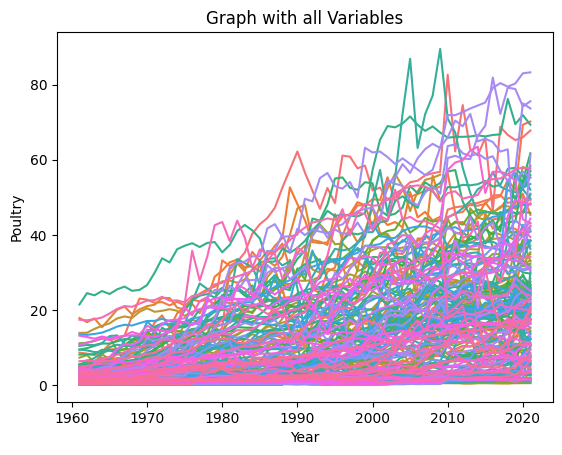

In [9]:
ax=sns.lineplot(df_new,x='Year',y='Poultry',hue='Entity',legend=False)
ax.set_title("Graph with all Variables")

## **Question 2 (5 points):** Use your visualization to segment the dataset into at least 3 natural groups using any form of Pandas filtering functions. Save each group's data as its own DataFrame.

In [10]:
df1=df_new[df_new['Year']>2000]
df2=df_new[df_new['Entity']=="India"]
df3=df_new[df_new['Entity']=="United States"]

In [11]:
df1.head()

,Entity,Year,Poultry
40,Afghanistan,2001,0.672254
41,Afghanistan,2002,1.194718
42,Afghanistan,2003,1.265783
43,Afghanistan,2004,1.519444
44,Afghanistan,2005,2.271090


In [12]:
df3.head()

,Entity,Year,Poultry
9470,United States,1961,17.375313
9471,United States,1962,17.210272
9472,United States,1963,17.518639
9473,United States,1964,17.961380
9474,United States,1965,19.031420


## **Question 3 (5 points):** Print a summary of each DataFrame including its size, shape, and descriptive statistics using the describe function. Write a few sentences in a text cell on if any relationships emerge and if the results are surprising or expected.

In [13]:
print(df1.describe()) # data post 2000 for all countries

              Year      Poultry
count  3773.000000  3773.000000
mean   2011.103896    19.404948
std       6.063627    16.329020
min    2001.000000     0.058878
25%    2006.000000     5.578009
50%    2011.000000    16.340000
75%    2016.000000    27.910185
max    2021.000000    89.530410


In [14]:
print(df2.describe()) #data for India, poultry consumption

              Year    Poultry
count    61.000000  61.000000
mean   1991.000000   0.898747
std      17.752934   0.916336
min    1961.000000   0.159440
25%    1976.000000   0.169887
50%    1991.000000   0.588279
75%    2006.000000   1.326261
max    2021.000000   3.230000


In [15]:
print(df3.describe()) #data for USA, poultry consumption


              Year    Poultry
count    61.000000  61.000000
mean   1991.000000  38.077642
std      17.752934  13.549882
min    1961.000000  17.210272
25%    1976.000000  23.697935
50%    1991.000000  41.929802
75%    2006.000000  50.120000
max    2021.000000  57.889996


Naturally, the poultry consumption numbers for the USA are far greater than the numbers for India. The standard deviation for poultry consumption numbers for the 2000s is pretty high, which kind of makes sense as it includes data for all countries, and there may be large discrepancies there. 
One thing that didnt make sense was a pretty high std value for the USA, I assumed, poultry consumption would more or less be similar or with a slight positive slope, but not super high. 

## Part 2: Getting Data From APIs and Web Scraping (30 points)
A great source of data and Pandas practice is getting data from the Internet. Rather than a .csv file, many data will be in a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

In the 2nd part of this lab, you will choose from utilizing a simple API for getting and analyzing data through a variety of queries or web scraping a page.

**Web Scraping Examples**
* Any Wikipedia page
  * https://en.wikipedia.org/wiki/Capybara  
  * https://en.m.wikipedia.org/wiki/List_of_common_misconceptions
* https://toscrape.com/
* https://www.scrapethissite.com/
* https://github.com/stanfordjournalism/search-script-scrape


**API Examples**
*   https://pokeapi.co/
  * Example: https://pokeapi.co/api/v2/pokemon?limit=1000&offset=0
* https://place.dog/
* https://dukengn.github.io/Dog-facts-API/  
* https://apiv3.iucnredlist.org/api/v3/docs

A more exhaustive API list can be found at: https://github.com/public-apis/public-apis.


In [16]:
!pip install requests beautifulsoup4 pillow 
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import time

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 147.9/147.9 kB 8.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



## **Question 1 (5 points):** Pick a URL (several examples are above) to either web scrape data from OR query using an API (no need to do both). Download your initial raw data using the `requests` package and store it in a variable.

## Print your variable. Observe what kind of data your API or website can produce and design a DataFrame of at least 1 column you would like to create. Write the feature(s) you plan on obtaining below.



### **URL Chosen:** https://en.wikipedia.org/wiki/LeBron_James

### **API or Web Scraping:** Web Scraping

### **DataFrame Column(s):** Feature 1

In [17]:
#my tag is images
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/LeBron_James'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [18]:
response

<Response [200]>

In [19]:
# Find all images
images = soup.find_all('img')
images[0]

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>

## **Question 2 (10 points):**
## Create the DataFrame of your selected feature(s). Whether using an API or scraping, you might need to implement loops to extract enough clean features to use. Be creative with using iteration and data structures to get your data! 

In [20]:
# save image links in data frame

img_links = []
for img in images:
    img_src = img['src']
    img_links.append(img_src)
img_links[0:5]

['/static/images/icons/wikipedia.png',
 '/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 '/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 '//upload.wikimedia.org/wikipedia/en/thumb/9/94/Symbol_support_vote.svg/19px-Symbol_support_vote.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png']

In [21]:
img_links = [link for link in img_links if link[-4:] == ".png"]
img_links[0:5]

['/static/images/icons/wikipedia.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/9/94/Symbol_support_vote.svg/19px-Symbol_support_vote.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/10px-OOjs_UI_icon_edit-ltr-progressive.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/10px-OOjs_UI_icon_edit-ltr-progressive.svg.png']

In [22]:
img_links = [link for link in img_links if "/static/" not in link]
img_links[0:5]

['//upload.wikimedia.org/wikipedia/en/thumb/9/94/Symbol_support_vote.svg/19px-Symbol_support_vote.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/10px-OOjs_UI_icon_edit-ltr-progressive.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/10px-OOjs_UI_icon_edit-ltr-progressive.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Flag_of_the_United_States_%2823px%29.png/23px-Flag_of_the_United_States_%2823px%29.png']

In [23]:
img_links_clean = []
for link in img_links:
    full_link = "https:"+link
    img_links_clean.append(full_link)
img_links_clean

['https://upload.wikimedia.org/wikipedia/en/thumb/9/94/Symbol_support_vote.svg/19px-Symbol_support_vote.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/10px-OOjs_UI_icon_edit-ltr-progressive.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/10px-OOjs_UI_icon_edit-ltr-progressive.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Flag_of_the_United_States_%2823px%29.png/23px-Flag_of_the_United_States_%2823px%29.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Gold_medal_icon_%28G_initial%29.svg/16px-Gold_medal_icon_%28G_initial%29.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Gold_medal_icon_%28G_initial%29.svg/16px-Gold_medal_icon_%28G_initial%29.svg.png',
 'https://upload.wikimedia.org/wikipedia/comm

## **Question 3 (15 points):** Perform an exploratory analysis on the DataFrame you've created, making modifications to it as necessary. Some example features to explore include:
* If you've scraped text data, plot a few rows of data
* If you've scraped any image URLs, plot a few of them
* If you've scraped any image URLs, add a column for file extension type
* Run some value counts on different variables
* If your columns are messy or hard to read, rename them
* Cast data types into a usable state (ie: string to integer for numerical analysis)

## After exploring, write down 1 to 2 sentences about any interestings aspects of your data (group characteristics, clear relationships between variables) or your process of getting it.

In [24]:
import matplotlib.pyplot as plt 
import matplotlib.image as img

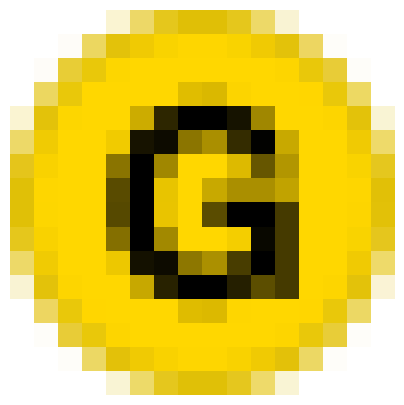

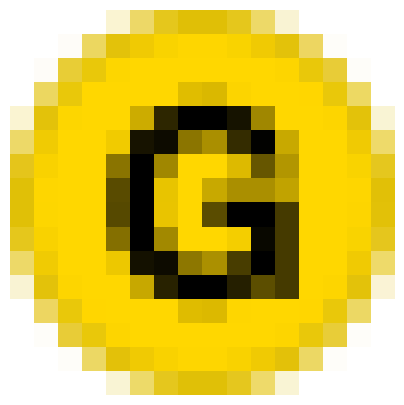

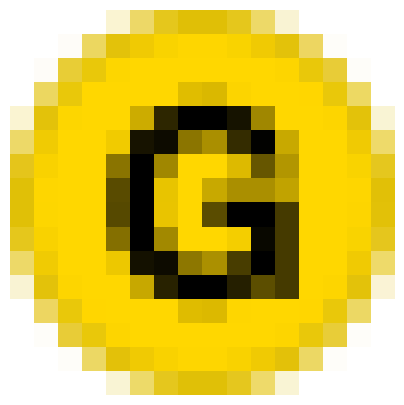

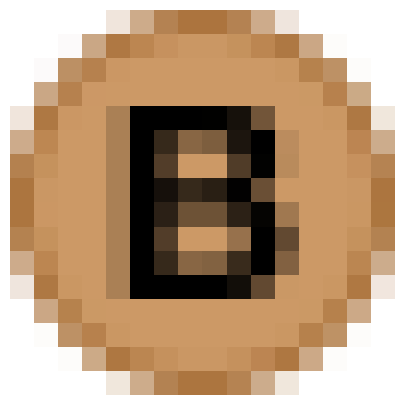

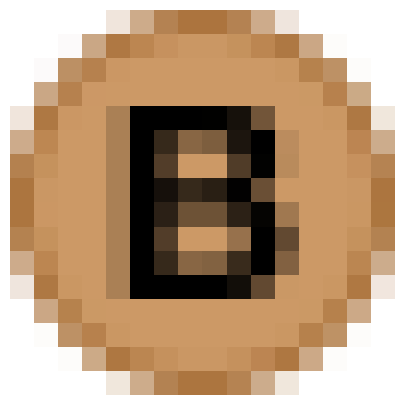

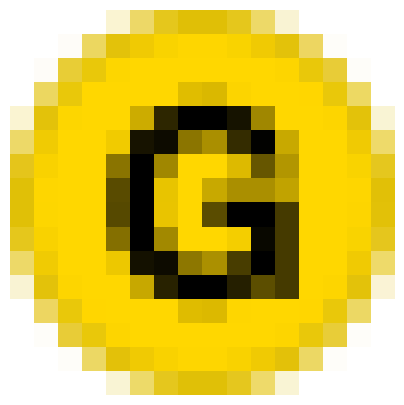

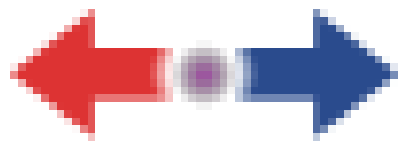

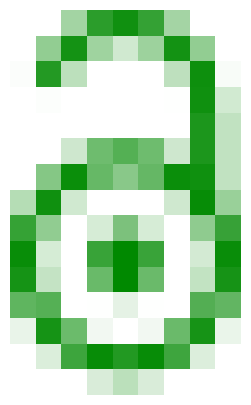

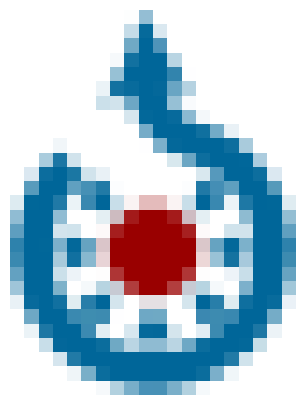

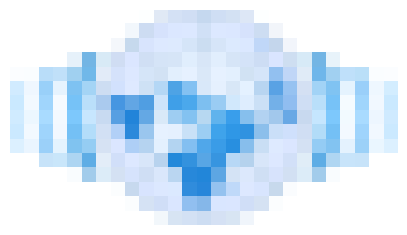

In [46]:
#was repeatedly printing the same picture, realised, I needed to have full_link being 
#reset every time I moved to the next position in the list
for link in img_links[5:15]:
    full_link = "https:"+link
    img_links_clean.append(full_link)
    
    '''!!! Very important to add wait times if using requests in a loop.'''
    time.sleep(2)
    response = requests.get(full_link)
    image = Image.open(BytesIO(response.content))
    
    plt.figure(figsize=(5, 5))  # Set the figure size as needed
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    #plt.title(f'{full_link}')  
    plt.show()

While trying to plot my images, I wasnt being able to access the list properly. I was just accessing one of the images and plotting it repeatedly, but then realized, I need to keep changing the value of my variable full_link (the link +https), as that is inside my for loop and initially I had the rest of my code outside the for loop (so there was only one value associated with the full_link)

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.

Atharv Gupta